In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [4]:
catsndogs = pd.read_csv("CATSnDOGS.csv")
labels = pd.read_csv("Labels.csv")

data_with_labels = pd.concat([catsndogs, labels], axis=1)
catsndogs = catsndogs.values
labels = labels.values.ravel()

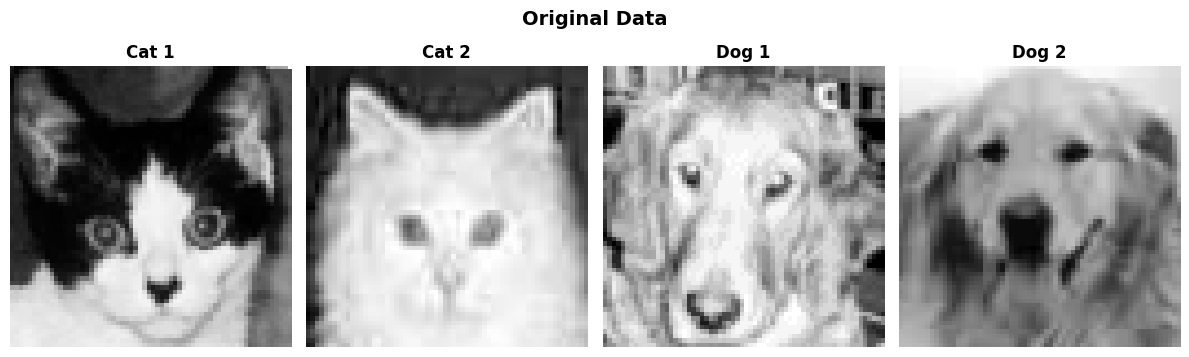

In [5]:
def rotate_matrix(x):
    return np.flip(x.T, axis=1)

np.random.seed(1042212)

cats_indices = np.where(labels == 0)[0]
dogs_indices = np.where(labels == 1)[0]

sample_cats = np.random.choice(cats_indices, 2, replace=False)
sample_dogs = np.random.choice(dogs_indices, 2, replace=False)

gray_scale = LinearSegmentedColormap.from_list("grayscale", [(i/255, i/255, i/255) for i in range(256)], N=256)

# Plot original data
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
titles = ['Cat 1', 'Cat 2', 'Dog 1', 'Dog 2']
for i, idx in enumerate([sample_cats[0], sample_cats[1], sample_dogs[0], sample_dogs[1]]):
    axs[i].imshow(rotate_matrix(catsndogs[idx].reshape(64, 64)), cmap=gray_scale)
    axs[i].axis('off')
    axs[i].set_title(titles[i], fontweight='bold', fontsize=12)
fig.suptitle('Original Data', fontsize=14, fontweight='bold', verticalalignment='top', y=0.8)
plt.tight_layout()
plt.show()

In [6]:
def misclassified_svm(y_true, y_pred, X_test):
    # Find indices where predictions and true labels don't match
    misclassified_indices = np.where(y_pred != y_true)[0]

    # Extract misclassified images based on these indices
    misclassified_images = [X_test[i] for i in misclassified_indices]

    # Get the predicted labels for these misclassified images
    misclassified_preds = y_pred[misclassified_indices]

    # Get the true labels for these misclassified images
    misclassified_trues = y_true[misclassified_indices]

    return misclassified_images, misclassified_preds, misclassified_trues


# Function to plot misclassified images
def plot_misclassified_svm(images, predicted, true_labels):
    if images:  # Check if the list is not empty
        plt.figure(figsize=(10, 10))
        num_images = len(images)
        num_to_plot = min(num_images, 25)  # Plot at most 25 images
        for i in range(num_to_plot):
            plt.subplot(5, 5, i + 1)  # Arranging plots in a 5x5 grid
            img_shape = int(np.sqrt(images[i].size))  # Assuming the images are square
            img = images[i].reshape((img_shape, img_shape))  # Reshape flat array to 2D
            plt.imshow(img, cmap='gray')
            if predicted[i] == 0:
              pred = 'Cat'
            else :
                pred = 'Dog'
            if true_labels[i] == 0:
              true_label = 'Cat'
            else:
              true_label = 'Dog'
            plt.title(f'Pred: {pred}, True: {true_label}')
            plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print("No misclassified images to display.")


In [7]:
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(catsndogs)

# PCA components
pca = PCA(n_components= 2)
X_pca = pca.fit_transform(X_scaled)

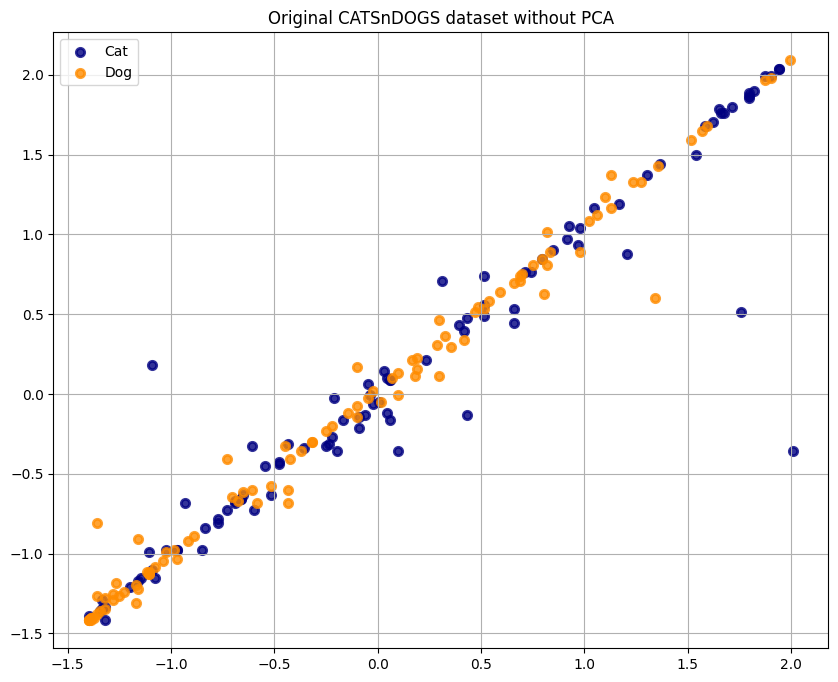

In [8]:

plt.figure(figsize=(10, 8))
colors = ['navy', 'darkorange']
for color, i, target_name in zip(colors, [0, 1], ['Cat', 'Dog']):
    plt.scatter(X_scaled[labels == i, 0], X_scaled[labels == i, 1],
                color=color, alpha=0.8, lw=2, label=target_name)

plt.title('Original CATSnDOGS dataset without PCA')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()

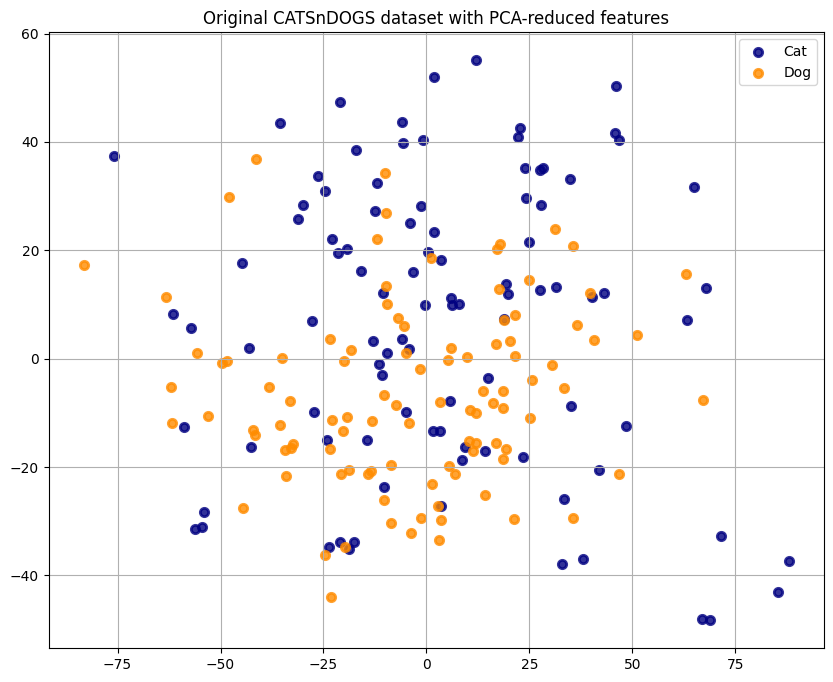

In [9]:
# Plotting points with cluster-based coloring
plt.figure(figsize=(10, 8))
colors = ['navy', 'darkorange']
for color, i, target_name in zip(colors, [0, 1], ['Cat', 'Dog']):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1],
                color=color, alpha=0.8, lw=2, label=target_name)

plt.title('Original CATSnDOGS dataset with PCA-reduced features')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()


## Kmeans
#### starting cluster the dataset with Kmeans

In [10]:
# Elbow heuristic
# Range of clusters to evaluate
iterations = 10
k_range = range(1, 15)
inertias_kmeans_avg = []

for k in k_range:
  inertias_kmeans = []
  for iter in range(iterations):
    kmeans = KMeans(n_clusters=k, random_state=iter, n_init=10)
    kmeans.fit(X_scaled)
    inertias_kmeans.append(kmeans.inertia_)
  inertias_kmeans_avg.append(np.mean(inertias_kmeans))



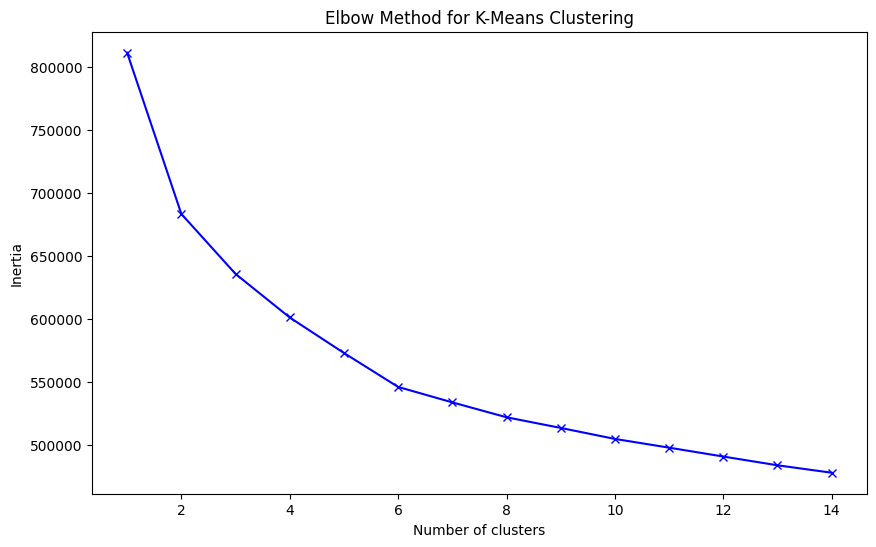

In [11]:
# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias_kmeans_avg, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means Clustering')
plt.show()

Number of clusters: 2, Accuracy: 0.49798
Number of clusters: 3, Accuracy: 0.28535
Number of clusters: 4, Accuracy: 0.23687
Number of clusters: 5, Accuracy: 0.21162
Number of clusters: 6, Accuracy: 0.17475
Number of clusters: 7, Accuracy: 0.15152
Number of clusters: 8, Accuracy: 0.16818
Number of clusters: 9, Accuracy: 0.12626
Number of clusters: 10, Accuracy: 0.10606
Number of clusters: 11, Accuracy: 0.10000
Number of clusters: 12, Accuracy: 0.08636
Number of clusters: 13, Accuracy: 0.07424
Number of clusters: 14, Accuracy: 0.05000


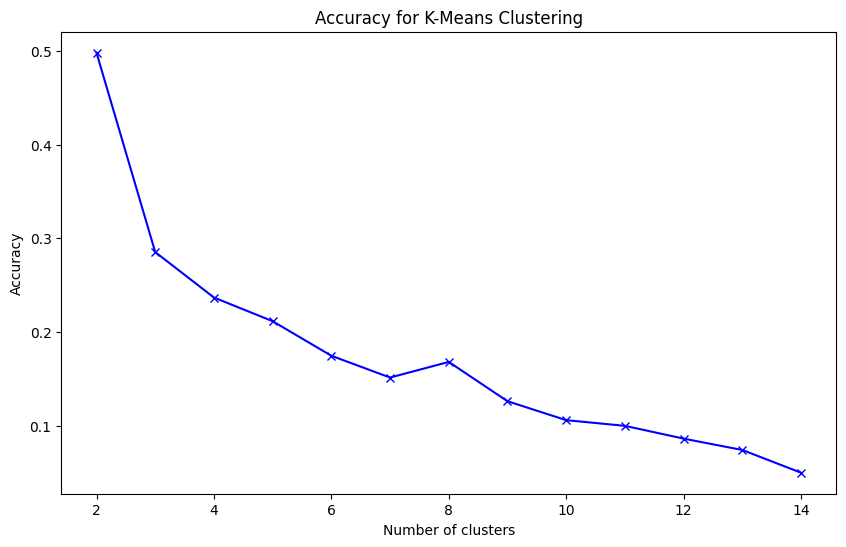

In [12]:
# Try with different K , Accuracy
k_range = range(2,15)
iterations = 10
accuracy_kmeans_avg= []
for k in k_range:  # Example range for K values
  accuracy_kmeans= []
  for iter in range(iterations):
    kmeans = KMeans(n_clusters=k, random_state=iter, n_init = 10)
    clusters = kmeans.fit_predict(X_scaled)

    # Assuming a mapping strategy to labels for evaluating
    # This step may need a more sophisticated approach for more than 2 clusters
    # For simplicity, using the same mapping as before
    # cluster_to_label = {i: (i % 2) for i in range(k)}
    # predicted_labels = np.vectorize(cluster.get)(clusters)

    accuracy = accuracy_score(labels, clusters)
    accuracy_kmeans.append(accuracy)
  accuracy_kmeans_avg.append(np.mean(accuracy_kmeans))
  print(f"Number of clusters: {k}, Accuracy: {np.mean(accuracy_kmeans):.5f}")


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_range,  accuracy_kmeans_avg, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-Means Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.1311868290485907
Confusion Matrix:
 [[47 50]
 [47 54]]
              precision    recall  f1-score   support

           0       0.50      0.48      0.49        97
           1       0.52      0.53      0.53       101

    accuracy                           0.51       198
   macro avg       0.51      0.51      0.51       198
weighted avg       0.51      0.51      0.51       198

Silhouette Score: 0.1311868290485907


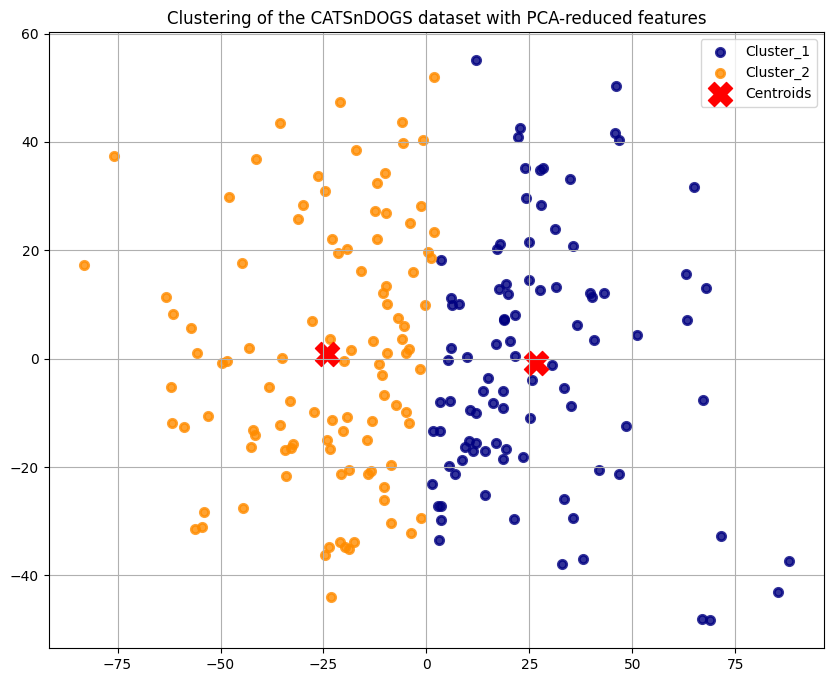

In [13]:
# Scale and PCA data
number_k = 2
kmeans = KMeans(n_clusters=number_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Evaluate clustering by silhouette score
score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {score}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, cluster_labels)
print("Confusion Matrix:\n", conf_matrix)

# Evaluate the model
print(classification_report(labels, cluster_labels))

# Evaluate clustering by silhouette score
score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {score}')

plt.figure(figsize=(10, 8))
colors = ['navy', 'darkorange']

# Plotting points with cluster-based coloring
for color, i, target_name in zip(colors, [0, 1], ['Cluster_1', 'Cluster_2']):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1],
                color=color, alpha=0.8, lw=2, label=target_name)

# Adding centroids
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Clustering of the CATSnDOGS dataset with PCA-reduced features')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.09840406845643197
Confusion Matrix:
 [[46 28 23]
 [14 44 43]
 [ 0  0  0]]
              precision    recall  f1-score   support

           0       0.77      0.47      0.59        97
           1       0.61      0.44      0.51       101
           2       0.00      0.00      0.00         0

    accuracy                           0.45       198
   macro avg       0.46      0.30      0.36       198
weighted avg       0.69      0.45      0.55       198

Silhouette Score: 0.09840406845643197


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


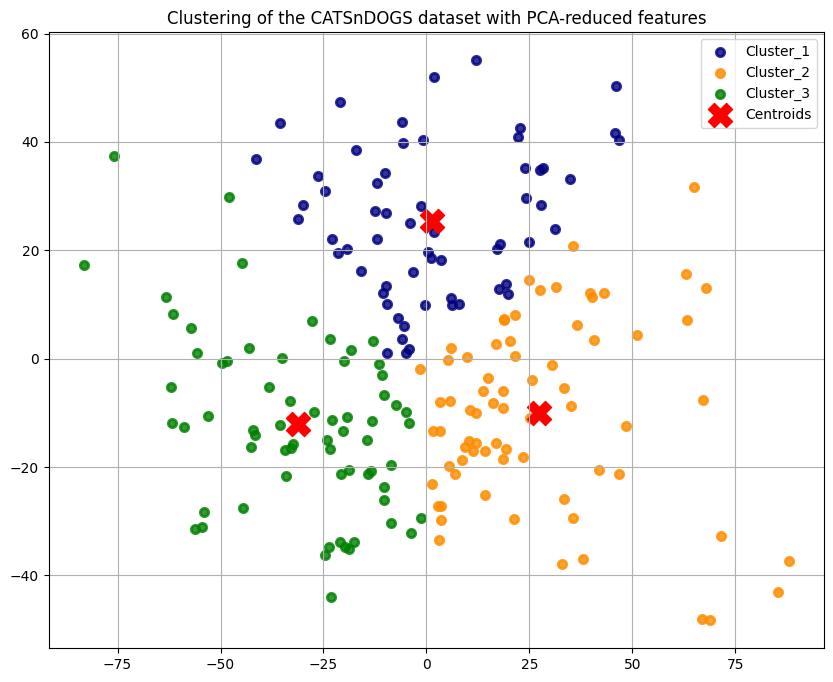

In [14]:
# Scale and PCA data
number_k = 3
kmeans = KMeans(n_clusters=number_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Evaluate clustering by silhouette score
score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {score}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, cluster_labels)
print("Confusion Matrix:\n", conf_matrix)

# Evaluate the model
print(classification_report(labels, cluster_labels))

# Evaluate clustering by silhouette score
score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {score}')

plt.figure(figsize=(10, 8))
colors = ['navy', 'darkorange','g']

# Plotting points with cluster-based coloring
for color, i, target_name in zip(colors, [0, 1,2], ['Cluster_1', 'Cluster_2','Cluster_3']):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1],
                color=color, alpha=0.8, lw=2, label=target_name)

# Adding centroids
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Clustering of the CATSnDOGS dataset with PCA-reduced features')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.09050831563480857
Confusion Matrix:
 [[23 15 38 21]
 [52  7 21 21]
 [ 0  0  0  0]
 [ 0  0  0  0]]
              precision    recall  f1-score   support

           0       0.31      0.24      0.27        97
           1       0.32      0.07      0.11       101
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.15       198
   macro avg       0.16      0.08      0.10       198
weighted avg       0.31      0.15      0.19       198

Silhouette Score: 0.09050831563480857


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


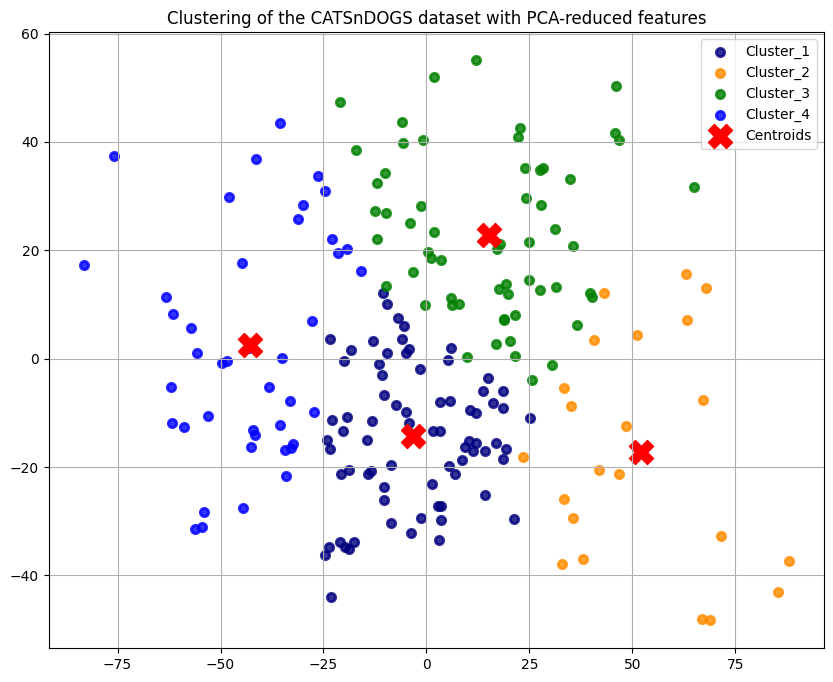

In [15]:
# Scale and PCA data
number_k = 4
kmeans = KMeans(n_clusters=number_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Evaluate clustering by silhouette score
score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {score}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, cluster_labels)
print("Confusion Matrix:\n", conf_matrix)

# Evaluate the model
print(classification_report(labels, cluster_labels))

# Evaluate clustering by silhouette score
score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {score}')

plt.figure(figsize=(10, 8))
colors = ['navy', 'darkorange','g','b']

# Plotting points with cluster-based coloring
for color, i, target_name in zip(colors, [0, 1,2,3], ['Cluster_1', 'Cluster_2','Cluster_3','Cluster_4']):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1],
                color=color, alpha=0.8, lw=2, label=target_name)

# Adding centroids
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Clustering of the CATSnDOGS dataset with PCA-reduced features')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()

Number of clusters: 2, Silhouette score: 0.13119
Number of clusters: 3, Silhouette score: 0.09840
Number of clusters: 4, Silhouette score: 0.09051
Number of clusters: 5, Silhouette score: 0.08490
Number of clusters: 6, Silhouette score: 0.08892
Number of clusters: 7, Silhouette score: 0.07911
Number of clusters: 8, Silhouette score: 0.07604
Number of clusters: 9, Silhouette score: 0.06593
Number of clusters: 10, Silhouette score: 0.07817
Number of clusters: 11, Silhouette score: 0.05982
Number of clusters: 12, Silhouette score: 0.04889
Number of clusters: 13, Silhouette score: 0.06178
Number of clusters: 14, Silhouette score: 0.05783


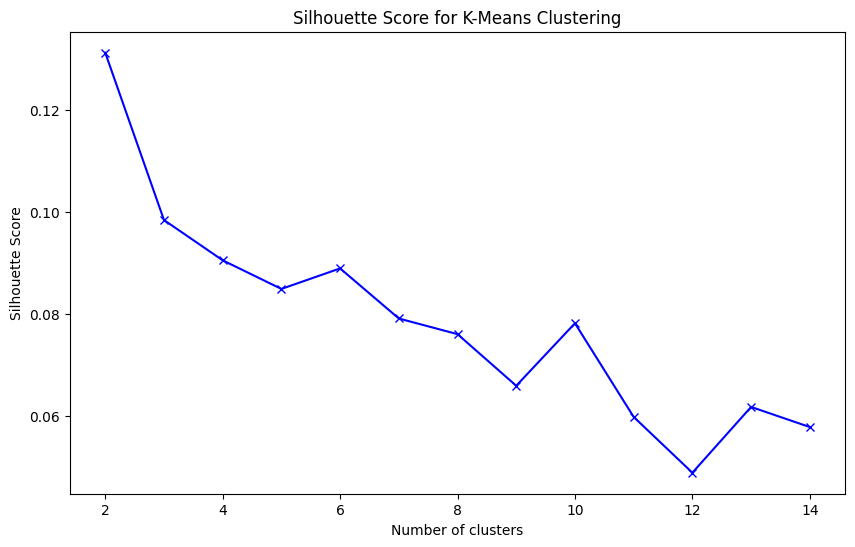

In [16]:
# Try with different K , Silhouette score
silhouette_scores_kmeans = []
k_range = range(2, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    clusters_kmeans = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters_kmeans)
    silhouette_scores_kmeans.append(score)
    print(f"Number of clusters: {k}, Silhouette score: {score:.5f}")

# Plotting the Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores_kmeans, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')
plt.show()

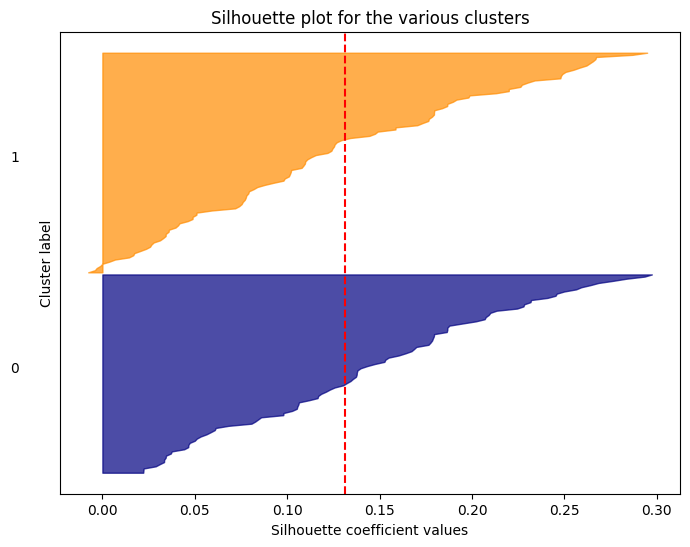

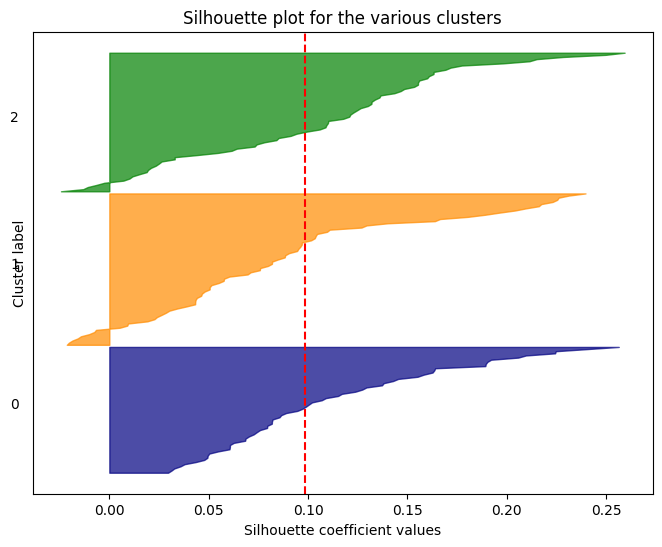

In [17]:
from sklearn.metrics import silhouette_samples
# Select k = 2 to see silhouette scores for each sample
def kmean_silhouette_plot(k):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
  clusters_kmeans = kmeans.fit_predict(X_scaled)
  silhouette_samples_avg = silhouette_score(X_scaled, clusters_kmeans)
  silhouette_samples_score = silhouette_samples(X_scaled, clusters_kmeans)
  # Plotting silhouette plot

  fig, ax = plt.subplots(figsize=(8, 6))
  n_clusters = k
  y_lower = 0
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples in cluster i
      ith_cluster_silhouette_values = silhouette_samples_score[clusters_kmeans == i]
      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      # color = plt.cm.nipy_spectral(float(i) / n_clusters)
      colors = ['navy', 'darkorange','g','m']
      ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=colors[i], edgecolor=colors[i], alpha=0.7)

      # Label the silhouette plots with their cluster numbers in the middle
      ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i ))

      # Compute the new y_lower for the next plot
      y_lower = y_upper # 10 for the 0 samples

  ax.set_title("Silhouette plot for the various clusters")
  ax.set_xlabel("Silhouette coefficient values")
  ax.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax.axvline(x=silhouette_samples_avg, color="red", linestyle="--")

  ax.set_yticks([])  # Clear the yaxis labels / ticks
  # ax.set_xticks(np.arange(-0.5, 0.5))

  plt.show()
k_mean_set = [2,3]
for k in k_mean_set:
  kmean_silhouette_plot(k)

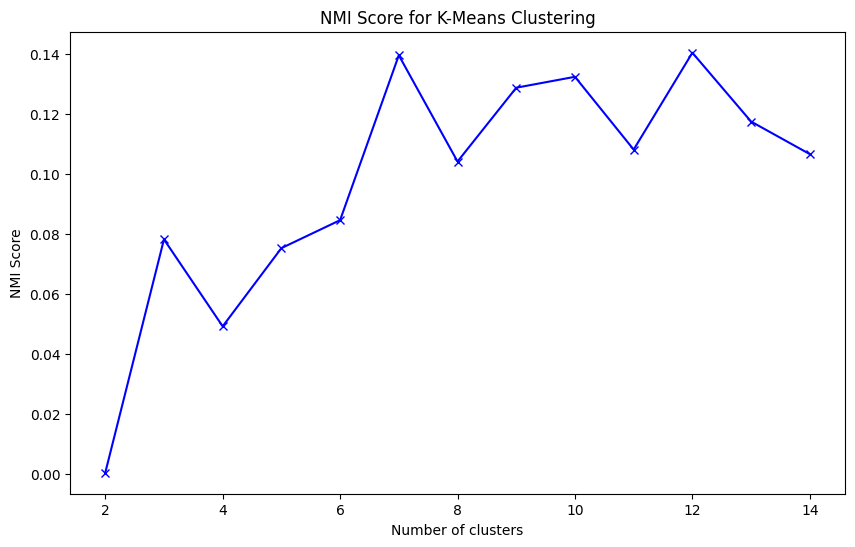

In [18]:
from sklearn.metrics import normalized_mutual_info_score
# Range of clusters to evaluate
k_range = range(2, 15)
nmi_scores_kmeans = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters_kmeans = kmeans.fit_predict(X_scaled)
    nmi_score = normalized_mutual_info_score(labels, clusters_kmeans)
    nmi_scores_kmeans.append(nmi_score)

# Plotting the NMI scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, nmi_scores_kmeans, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('NMI Score')
plt.title('NMI Score for K-Means Clustering')
plt.show()

## PAM

In [19]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.9 MB/s eta 0:00:00


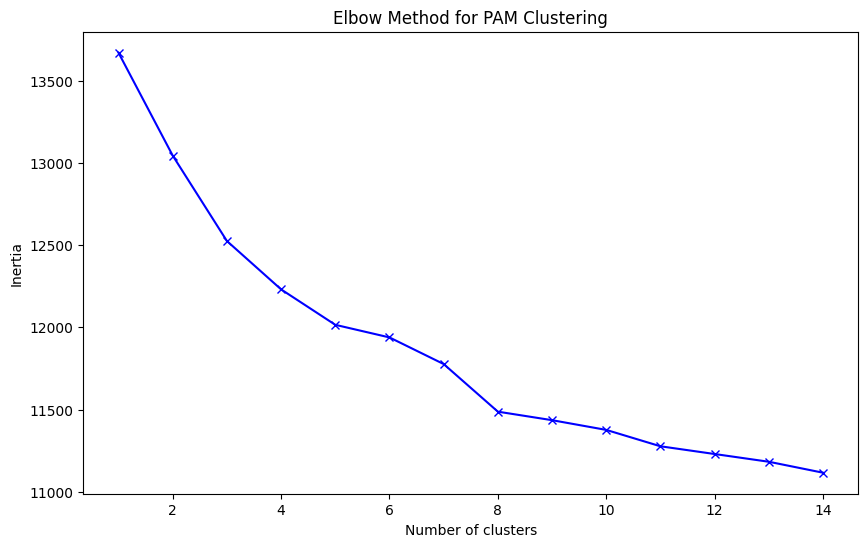

In [20]:
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

# Range of clusters to evaluate
k_range = range(1, 15)
inertias_pam = []

for k in k_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(X_scaled)
    inertias_pam.append(kmedoids.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias_pam, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for PAM Clustering')
plt.show()


In [21]:
# Perform PAM clustering
kmedoids = KMedoids(n_clusters=8, random_state=42)
clusters_pam = kmedoids.fit_predict(X_scaled)

# Map clusters to labels
# Assuming cluster 0 -> label 0 and cluster 1 -> label 1 (cats and dogs)
# cluster_to_label_pam = {0: 0, 1: 1}
# predicted_labels_pam = np.vectorize(cluster_to_label_pam.get)(clusters_pam)

# Evaluate accuracy
accuracy_pam = accuracy_score(labels, clusters_pam)
print(f"PAM Clustering Accuracy: {accuracy_pam:.5f}")

PAM Clustering Accuracy: 0.15657


PAM Clustering - Number of clusters: 2, Accuracy: 0.66667
PAM Clustering - Number of clusters: 3, Accuracy: 0.47475
PAM Clustering - Number of clusters: 4, Accuracy: 0.12626
PAM Clustering - Number of clusters: 5, Accuracy: 0.08081
PAM Clustering - Number of clusters: 6, Accuracy: 0.08081
PAM Clustering - Number of clusters: 7, Accuracy: 0.08081
PAM Clustering - Number of clusters: 8, Accuracy: 0.15657
PAM Clustering - Number of clusters: 9, Accuracy: 0.15657
PAM Clustering - Number of clusters: 10, Accuracy: 0.12626
PAM Clustering - Number of clusters: 11, Accuracy: 0.11111
PAM Clustering - Number of clusters: 12, Accuracy: 0.11111
PAM Clustering - Number of clusters: 13, Accuracy: 0.11111
PAM Clustering - Number of clusters: 14, Accuracy: 0.09091


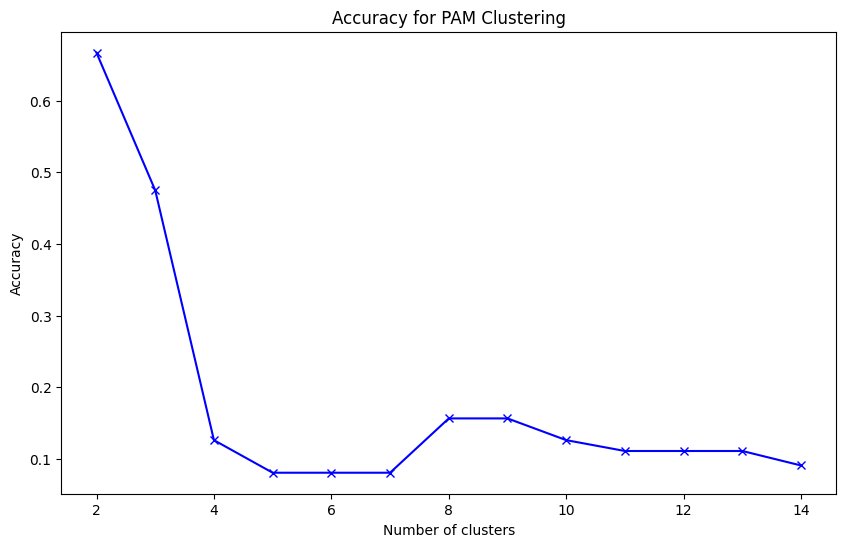

In [22]:
# Accuracy for different K
accuracy_pams = []
k_range=range(2,15)
for k in range(2, 15):
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    clusters_pam = kmedoids.fit_predict(X_scaled)

    # cluster_to_label_pam = {i: (i % 2) for i in range(k)}
    # predicted_labels_pam = np.vectorize(cluster_to_label_pam.get)(clusters_pam)

    # Evaluate accuracy
    accuracy_pam = accuracy_score(labels, clusters_pam)
    accuracy_pams.append(accuracy_pam)
    print(f"PAM Clustering - Number of clusters: {k}, Accuracy: {accuracy_pam:.5f}")


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_pams, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Accuracy')
plt.title('Accuracy for PAM Clustering')
plt.show()

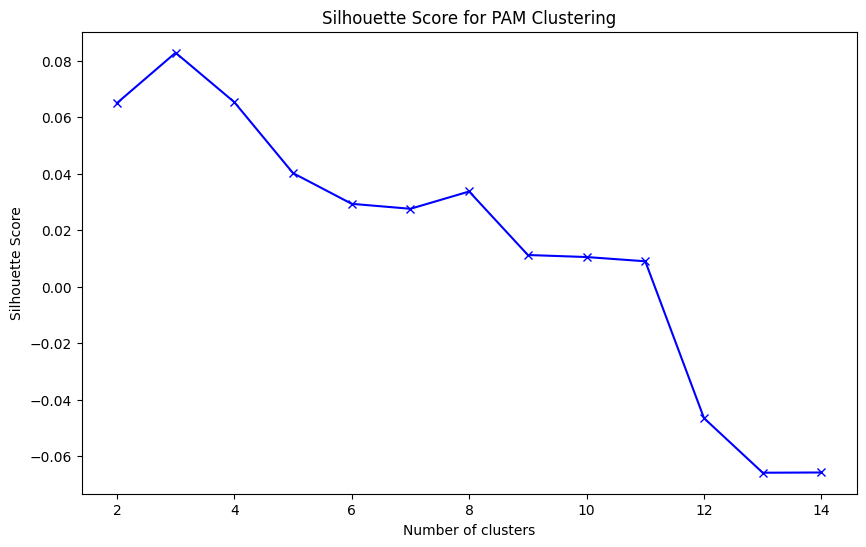

In [23]:
# Silhouette score for different K
silhouette_scores_pam = []
k_range = range(2,15)
for k in k_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    clusters_pam = kmedoids.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters_pam)
    silhouette_scores_pam.append(score)

# Plotting the Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores_pam, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for PAM Clustering')
plt.show()

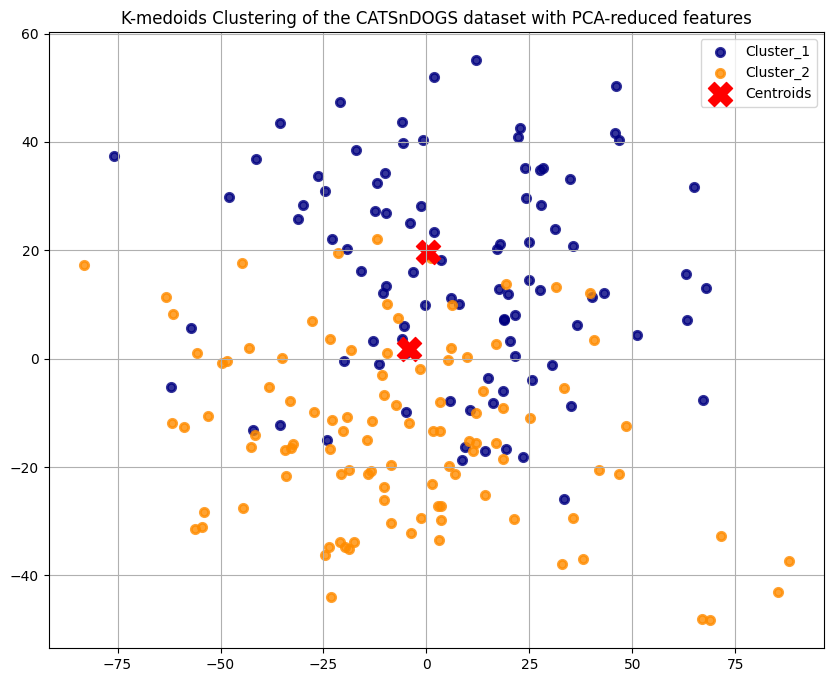

In [24]:
# k = 2
kmedoids = KMedoids(n_clusters=2, random_state=42)
clusters_pam = kmedoids.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
colors = ['navy', 'darkorange']

# Plotting points with cluster-based coloring
for color, i, target_name in zip(colors, [0, 1], ['Cluster_1', 'Cluster_2']):
    plt.scatter(X_pca[clusters_pam == i, 0], X_pca[ clusters_pam == i, 1],
                color=color, alpha=0.8, lw=2, label=target_name)

# Adding centroids
centers = pca.transform(kmedoids.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('K-medoids Clustering of the CATSnDOGS dataset with PCA-reduced features')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()

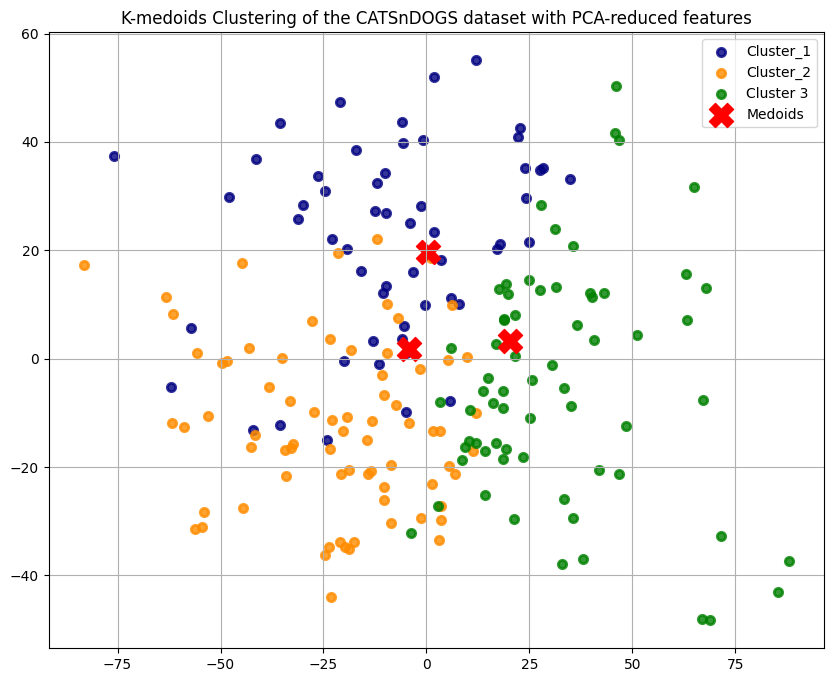

In [25]:
# K = 3
kmedoids = KMedoids(n_clusters=3, random_state=42)
clusters_pam = kmedoids.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
colors = ['navy', 'darkorange','g']

# Plotting points with cluster-based coloring
for color, i, target_name in zip(colors, [0, 1,2], ['Cluster_1', 'Cluster_2','Cluster 3']):
    plt.scatter(X_pca[clusters_pam == i, 0], X_pca[ clusters_pam == i, 1],
                color=color, alpha=0.8, lw=2, label=target_name)

# Adding centroids
centers = pca.transform(kmedoids.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X', label='Medoids')

plt.title('K-medoids Clustering of the CATSnDOGS dataset with PCA-reduced features')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()

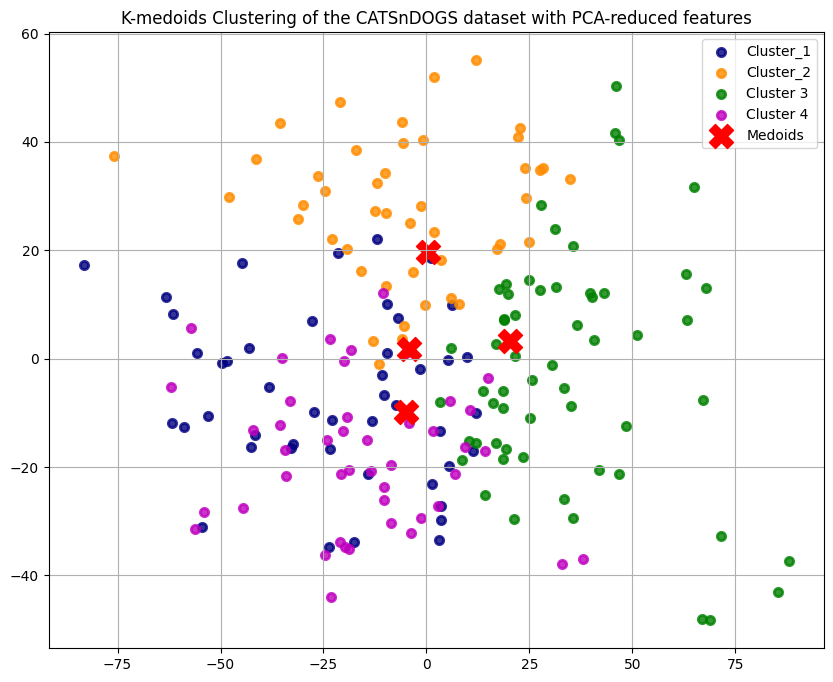

In [26]:
# K = 4
kmedoids = KMedoids(n_clusters=4, random_state=42)
clusters_pam = kmedoids.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
colors = ['navy', 'darkorange','g','m']

# Plotting points with cluster-based coloring
for color, i, target_name in zip(colors, [0, 1,2,3], ['Cluster_1', 'Cluster_2','Cluster 3','Cluster 4']):
    plt.scatter(X_pca[clusters_pam == i, 0], X_pca[ clusters_pam == i, 1],
                color=color, alpha=0.8, lw=2, label=target_name)

# Adding centroids
centers = pca.transform(kmedoids.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X', label='Medoids')

plt.title('K-medoids Clustering of the CATSnDOGS dataset with PCA-reduced features')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()

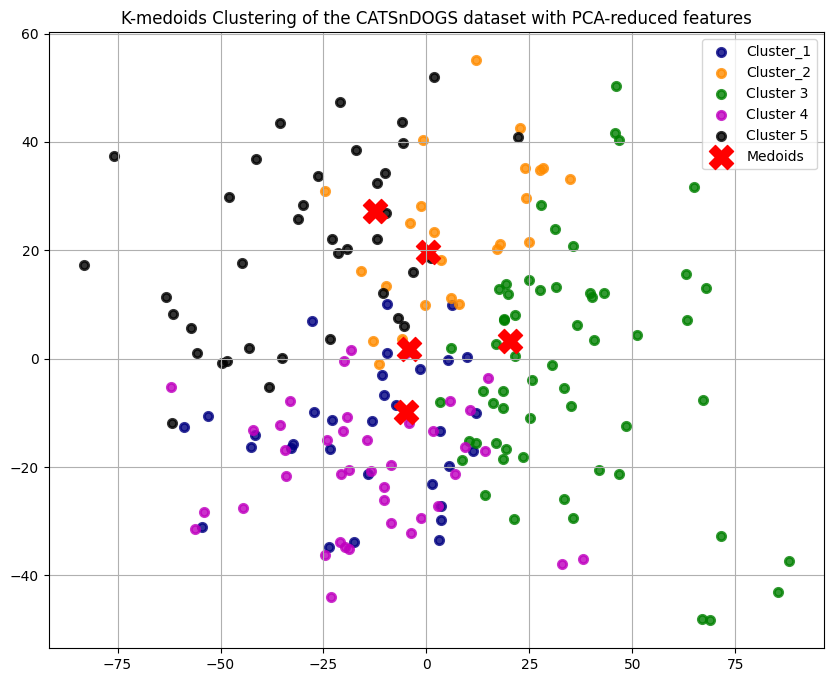

In [47]:
# K = 5
kmedoids = KMedoids(n_clusters=5, random_state=42)
clusters_pam = kmedoids.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
colors = ['navy', 'darkorange','g','m','k']

# Plotting points with cluster-based coloring
for color, i, target_name in zip(colors, [0, 1,2,3,4], ['Cluster_1', 'Cluster_2','Cluster 3','Cluster 4','Cluster 5']):
    plt.scatter(X_pca[clusters_pam == i, 0], X_pca[ clusters_pam == i, 1],
                color=color, alpha=0.8, lw=2, label=target_name)

# Adding centroids
centers = pca.transform(kmedoids.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X', label='Medoids')

plt.title('K-medoids Clustering of the CATSnDOGS dataset with PCA-reduced features')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()

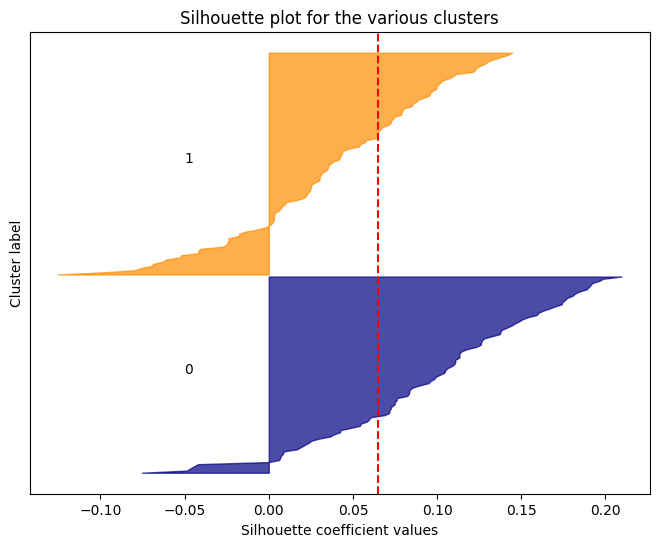

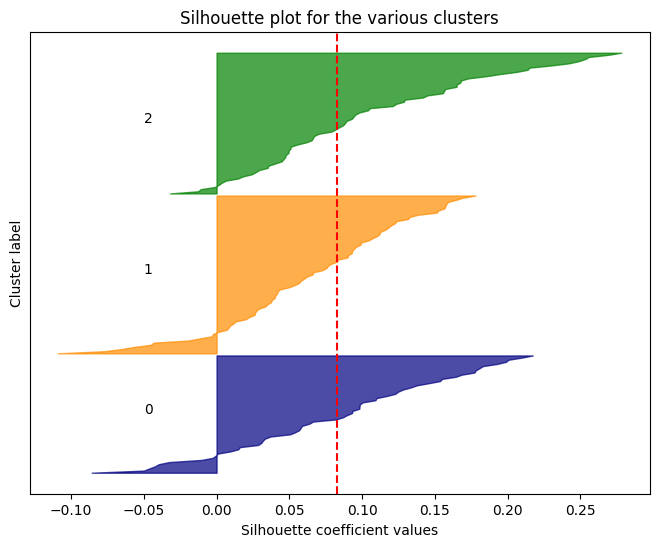

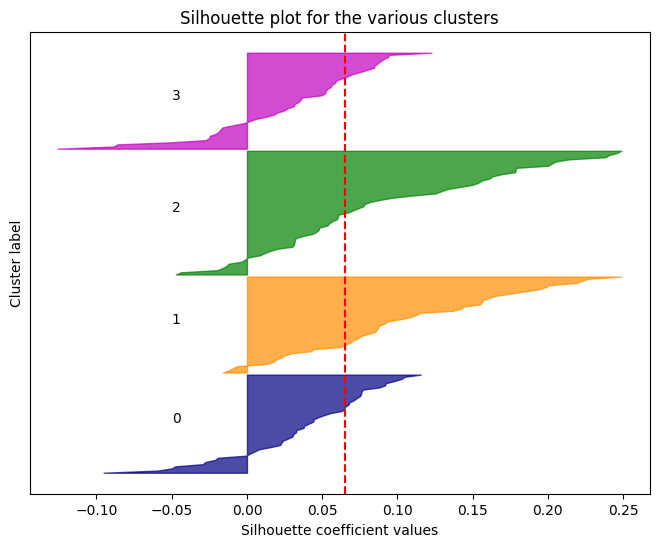

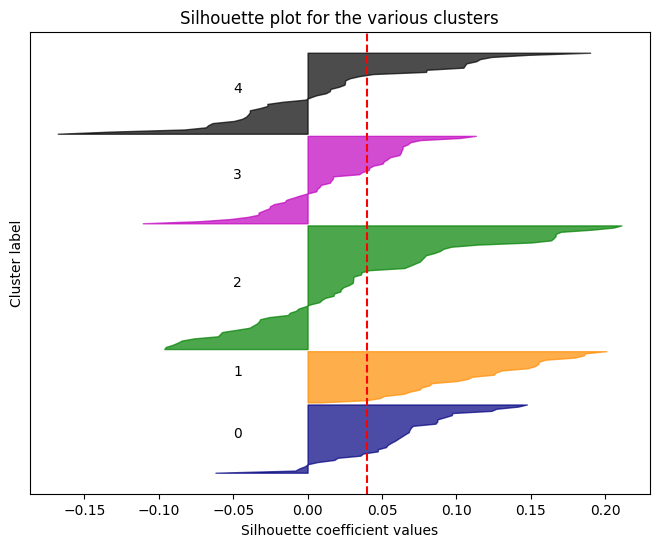

In [48]:
k_pam_optimum = [2,3]
def plot_silhouette_pam(k_clusters):
  # Select k = 2,3 to see silhouette scores for each sample
  kmedoids = KMedoids(n_clusters=k_clusters, random_state=42)
  clusters_pam = kmedoids.fit_predict(X_scaled)
  silhouette_samples_avg = silhouette_score(X_scaled, clusters_pam)
  silhouette_samples_score = silhouette_samples(X_scaled, clusters_pam)
  # Plotting silhouette plot

  fig, ax = plt.subplots(figsize=(8, 6))
  n_clusters = k_clusters
  y_lower = 0
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples in cluster i
      ith_cluster_silhouette_values = silhouette_samples_score[clusters_pam == i]
      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      # color = plt.cm.nipy_spectral(float(i) / n_clusters)
      colors = ['navy', 'darkorange','g','m','k']
      ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=colors[i], edgecolor=colors[i], alpha=0.7)

      # Label the silhouette plots with their cluster numbers in the middle
      ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i ))

      # Compute the new y_lower for the next plot
      y_lower = y_upper # 10 for the 0 samples

  ax.set_title("Silhouette plot for the various clusters")
  ax.set_xlabel("Silhouette coefficient values")
  ax.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax.axvline(x=silhouette_samples_avg, color="red", linestyle="--")

  ax.set_yticks([])  # Clear the yaxis labels / ticks
  # ax.set_xticks(np.arange(-0.2, 0.3, 0.2))

  plt.show()
k_pam_optimum = [2,3,4,5]
for k in k_pam_optimum:
  plot_silhouette_pam(k)

## Hierarchical Clustering (Bottom up appoarch)

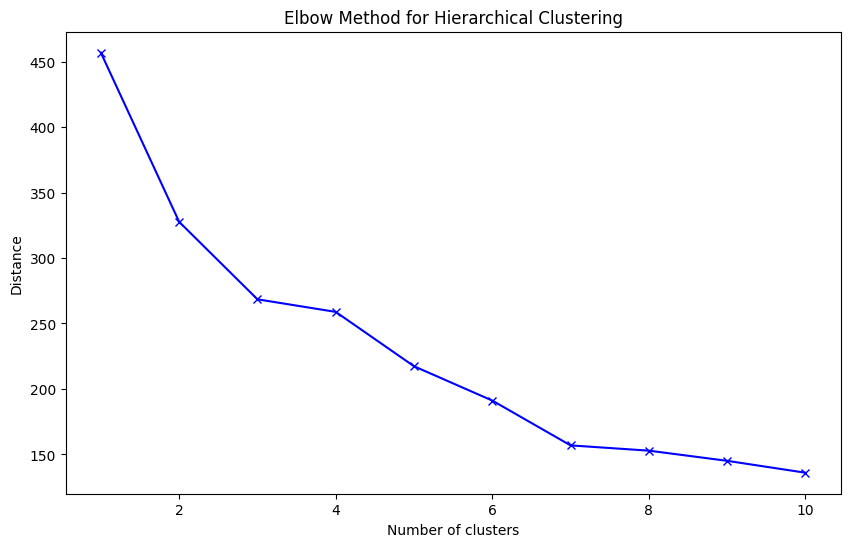

In [29]:
from scipy.cluster.hierarchy import linkage, fcluster

# Perform linkage for dendrogram
linked = linkage(X_scaled, method='ward')
last = linked[-10:, 2]
reversed_last = last[::-1]

idxs = np.arange(1, len(reversed_last) + 1)

plt.figure(figsize=(10, 6))
plt.plot(idxs, reversed_last, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distance')
plt.title('Elbow Method for Hierarchical Clustering')
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering

# Perform bottom-up hierarchical clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=2)
clusters_hierarchical = hierarchical_clustering.fit_predict(X_scaled)

# Map clusters to labels
# Assuming cluster 0 -> label 0 and cluster 1 -> label 1 (cats and dogs)
cluster_to_label_hierarchical = {0: 0, 1: 1}
predicted_labels_hierarchical = np.vectorize(cluster_to_label_hierarchical.get)(clusters_hierarchical)

# Evaluate accuracy
accuracy_hierarchical = accuracy_score(labels, predicted_labels_hierarchical)
print(f"Hierarchical Clustering Accuracy: {accuracy_hierarchical}")

Hierarchical Clustering Accuracy: 0.3888888888888889


Hierarchical Clustering - Number of clusters: 2, Accuracy: 0.38889
Hierarchical Clustering - Number of clusters: 3, Accuracy: 0.25253
Hierarchical Clustering - Number of clusters: 4, Accuracy: 0.25253
Hierarchical Clustering - Number of clusters: 5, Accuracy: 0.21717
Hierarchical Clustering - Number of clusters: 6, Accuracy: 0.12626
Hierarchical Clustering - Number of clusters: 7, Accuracy: 0.17172
Hierarchical Clustering - Number of clusters: 8, Accuracy: 0.11111
Hierarchical Clustering - Number of clusters: 9, Accuracy: 0.09091
Hierarchical Clustering - Number of clusters: 10, Accuracy: 0.09091
Hierarchical Clustering - Number of clusters: 11, Accuracy: 0.14141
Hierarchical Clustering - Number of clusters: 12, Accuracy: 0.04040
Hierarchical Clustering - Number of clusters: 13, Accuracy: 0.06061
Hierarchical Clustering - Number of clusters: 14, Accuracy: 0.08081


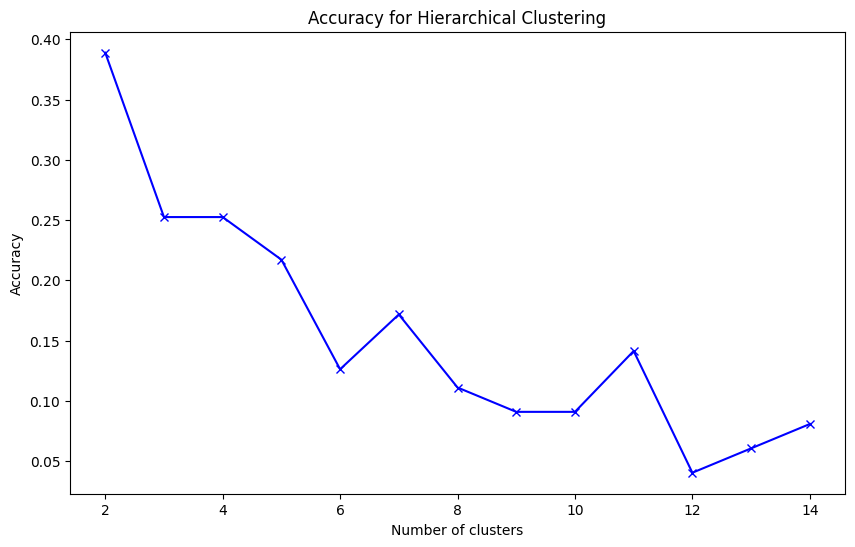

In [31]:
k_range = range(2,15)
accuracy_hierarchicals = []
for k in k_range:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=k)
    clusters_hierarchical = hierarchical_clustering.fit_predict(X_scaled)

    # cluster_to_label_hierarchical = {i: (i % 2) for i in range(k)}
    # predicted_labels_hierarchical = np.vectorize(cluster_to_label_hierarchical.get)(clusters_hierarchical)

    accuracy_hierarchical = accuracy_score(labels, clusters_hierarchical)
    accuracy_hierarchicals.append(accuracy_hierarchical)
    print(f"Hierarchical Clustering - Number of clusters: {k}, Accuracy: {accuracy_hierarchical:.5f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_hierarchicals, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Accuracy')
plt.title('Accuracy for Hierarchical Clustering')
plt.show()

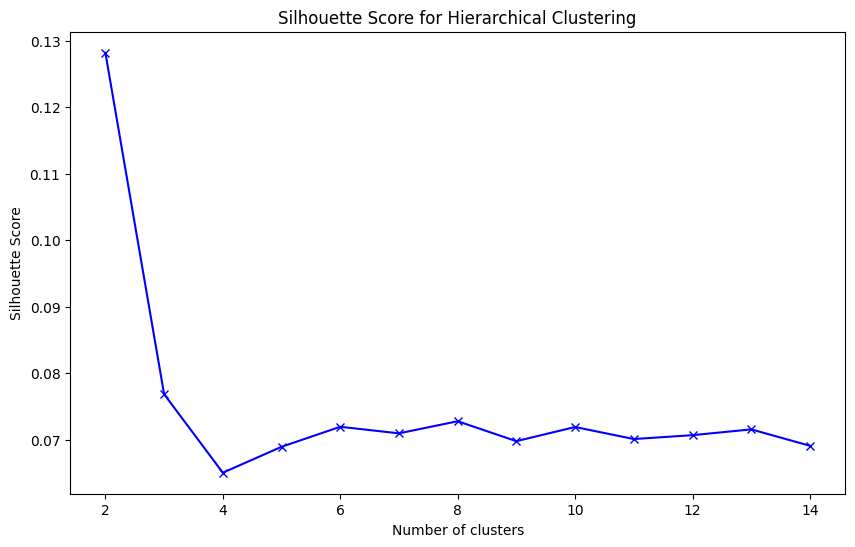

In [32]:
# Silhouette score
silhouette_scores_hierarchical = []
k_range = range(2,15)
for k in k_range:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=k)
    clusters_hierarchical = hierarchical_clustering.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters_hierarchical)
    silhouette_scores_hierarchical.append(score)

# Plotting the Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores_hierarchical, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.show()

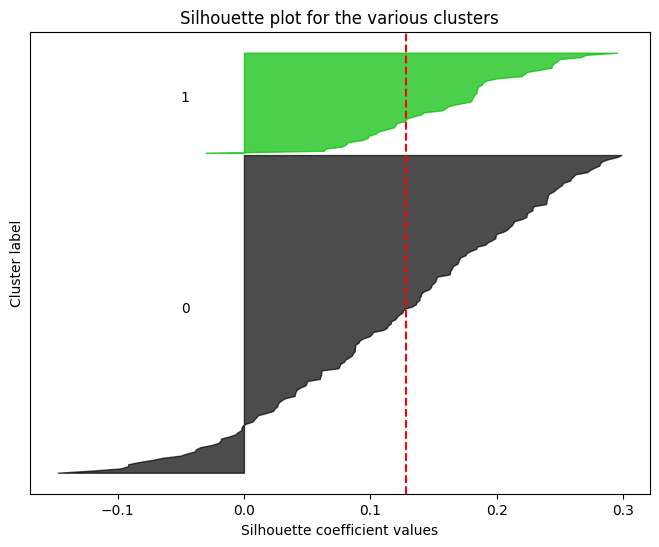

In [33]:
from sklearn.metrics import silhouette_samples
# Select k = 2 to see silhouette scores for each sample
k = 2
hierarchical_clustering = AgglomerativeClustering(n_clusters=k)
clusters_hierarchical = hierarchical_clustering.fit_predict(X_scaled)
silhouette_samples_avg = silhouette_score(X_scaled, clusters_hierarchical)
silhouette_samples_score = silhouette_samples(X_scaled, clusters_hierarchical)
# Plotting silhouette plot

fig, ax = plt.subplots(figsize=(8, 6))
n_clusters = 2
y_lower = 0
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples in cluster i
    ith_cluster_silhouette_values = silhouette_samples_score[clusters_hierarchical == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers in the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i ))

    # Compute the new y_lower for the next plot
    y_lower = y_upper # 10 for the 0 samples

ax.set_title("Silhouette plot for the various clusters")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_samples_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
# ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.show()

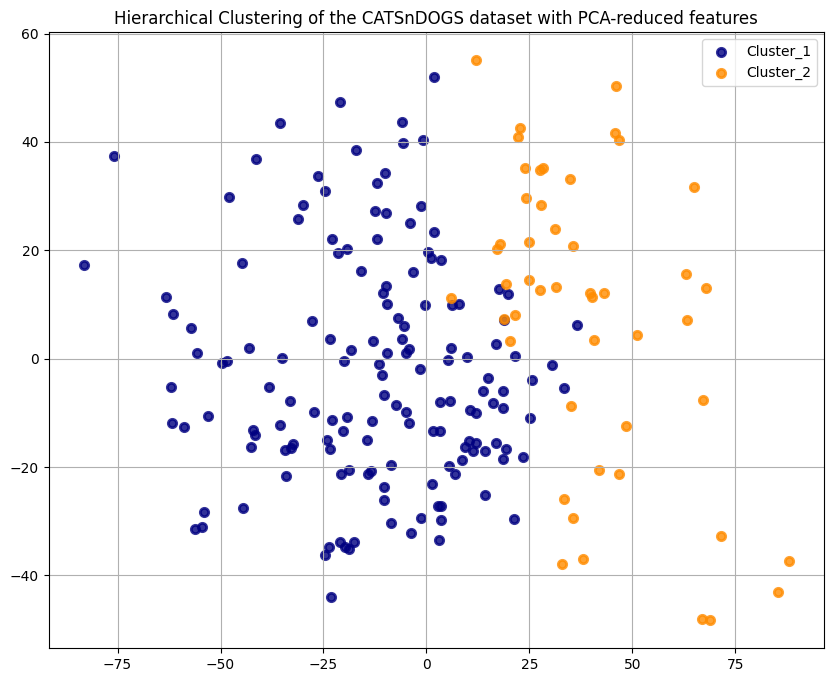

In [34]:
# k = 2
k = 2
hierarchical_clustering = AgglomerativeClustering(n_clusters=k)
clusters_hierarchical = hierarchical_clustering.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
colors = ['navy', 'darkorange']

# Plotting points with cluster-based coloring
for color, i, target_name in zip(colors, [0, 1], ['Cluster_1', 'Cluster_2']):
    plt.scatter(X_pca[clusters_hierarchical == i, 0], X_pca[ clusters_hierarchical == i, 1],
                color=color, alpha=0.8, lw=2, label=target_name)

# Adding centroids
# centers = pca.transform(clusters_hierarchical.cluster_centers_)
# plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Hierarchical Clustering of the CATSnDOGS dataset with PCA-reduced features')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()

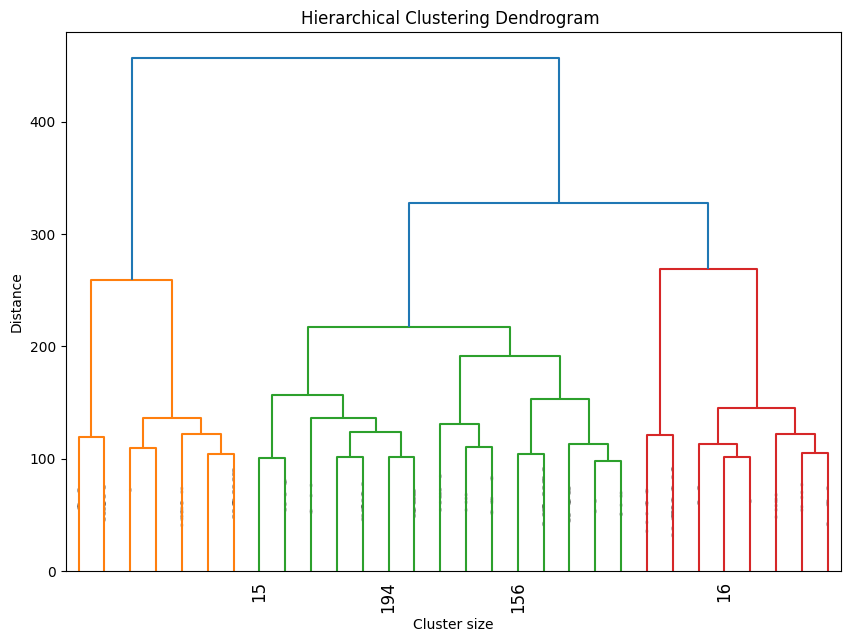

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform linkage for dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           truncate_mode='lastp',  # show only the last p merged clusters
            # show only the last 12 merged clusters
           show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           )
plt.title('Hierarchical Clustering Dendrogram ')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

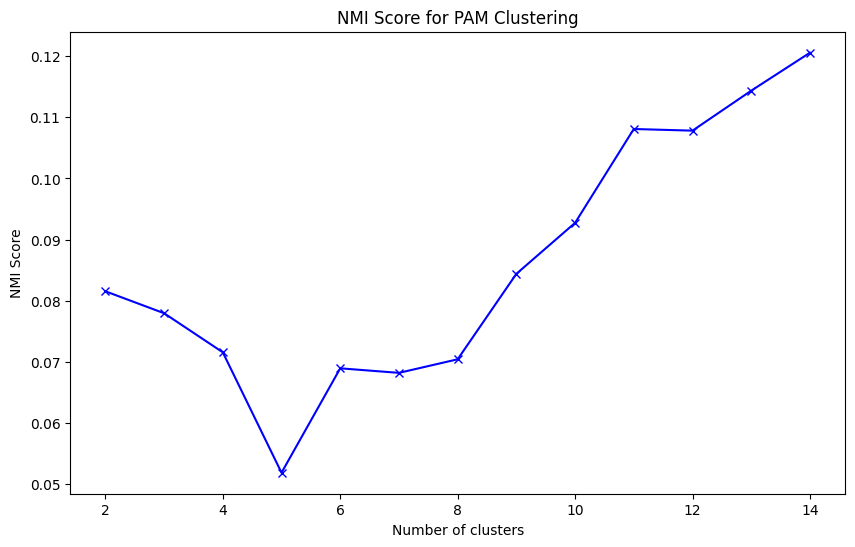

In [36]:
nmi_scores_pam = []
k_range = range(2,15)
for k in k_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    clusters_pam = kmedoids.fit_predict(X_scaled)
    nmi_score = normalized_mutual_info_score(labels, clusters_pam)
    nmi_scores_pam.append(nmi_score)

# Plotting the NMI scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, nmi_scores_pam, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('NMI Score')
plt.title('NMI Score for PAM Clustering')
plt.show()

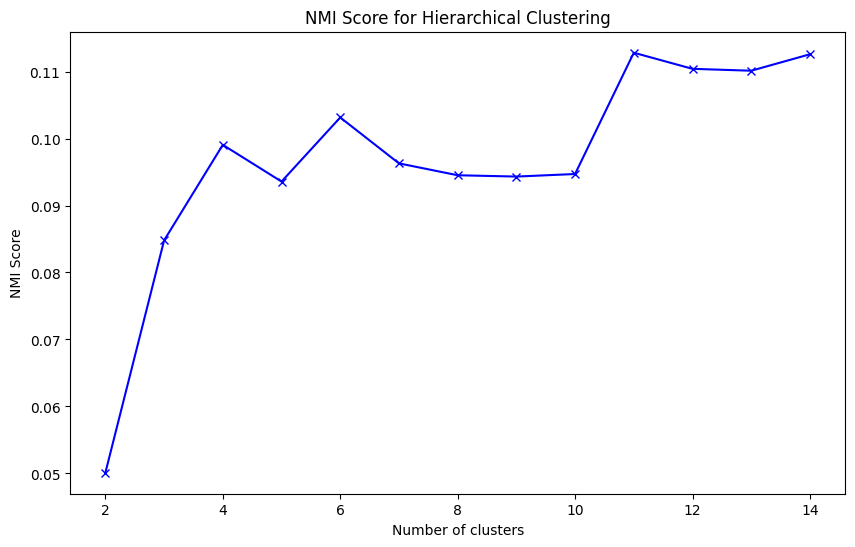

In [37]:
from sklearn.cluster import AgglomerativeClustering

nmi_scores_hierarchical = []

for k in k_range:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=k)
    clusters_hierarchical = hierarchical_clustering.fit_predict(X_scaled)
    nmi_score = normalized_mutual_info_score(labels, clusters_hierarchical)
    nmi_scores_hierarchical.append(nmi_score)

# Plotting the NMI scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, nmi_scores_hierarchical, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('NMI Score')
plt.title('NMI Score for Hierarchical Clustering')
plt.show()